In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

In [2]:
data_raw = pd.read_csv(r'C:\Users\shash\Downloads\archive (2)\IPIP-FFM-data-8Nov2018\data-final.csv', sep='\t')
data = data_raw.copy()
pd.options.display.max_columns = 150

data.drop(data.columns[50:107], axis=1, inplace=True)
data.drop(data.columns[51:], axis=1, inplace=True)

print('Number of participants: ', len(data))
data.head()

Number of participants:  1015341


,EXT1,EXT2,EXT3,EXT4,EXT5,EXT6,EXT7,EXT8,EXT9,EXT10,EST1,EST2,EST3,EST4,EST5,EST6,EST7,EST8,EST9,EST10,AGR1,AGR2,AGR3,AGR4,AGR5,AGR6,AGR7,AGR8,AGR9,AGR10,CSN1,CSN2,CSN3,CSN4,CSN5,CSN6,CSN7,CSN8,CSN9,CSN10,OPN1,OPN2,OPN3,OPN4,OPN5,OPN6,OPN7,OPN8,OPN9,OPN10,country
0,4.0,1.0,5.0,2.0,5.0,1.0,5.0,2.0,4.0,1.0,1.0,4.0,4.0,2.0,2.0,2.0,2.0,2.0,3.0,2.0,2.0,5.0,2.0,4.0,2.0,3.0,2.0,4.0,3.0,4.0,3.0,4.0,3.0,2.0,2.0,4.0,4.0,2.0,4.0,4.0,5.0,1.0,4.0,1.0,4.0,1.0,5.0,3.0,4.0,5.0,GB
1,3.0,5.0,3.0,4.0,3.0,3.0,2.0,5.0,1.0,5.0,2.0,3.0,4.0,1.0,3.0,1.0,2.0,1.0,3.0,1.0,1.0,4.0,1.0,5.0,1.0,5.0,3.0,4.0,5.0,3.0,3.0,2.0,5.0,3.0,3.0,1.0,3.0,3.0,5.0,3.0,1.0,2.0,4.0,2.0,3.0,1.0,4.0,2.0,5.0,3.0,MY
2,2.0,3.0,4.0,4.0,3.0,2.0,1.0,3.0,2.0,5.0,4.0,4.0,4.0,2.0,2.0,2.0,2.0,2.0,1.0,3.0,1.0,4.0,1.0,4.0,2.0,4.0,1.0,4.0,4.0,3.0,4.0,2.0,2.0,2.0,3.0,3.0,4.0,2.0,4.0,2.0,5.0,1.0,2.0,1.0,4.0,2.0,5.0,3.0,4.0,4.0,GB
3,2.0,2.0,2.0,3.0,4.0,2.0,2.0,4.0,1.0,4.0,3.0,3.0,3.0,2.0,3.0,2.0,2.0,2.0,4.0,3.0,2.0,4.0,3.0,4.0,2.0,4.0,2.0,4.0,3.0,4.0,2.0,4.0,4.0,4.0,1.0,2.0,2.0,3.0,1.0,4.0,4.0,2.0,5.0,2.0,3.0,1.0,4.0,4.0,3.0,3.0,GB
4,3.0,3.0,3.0,3.0,5.0,3.0,3.0,5.0,3.0,4.0,1.0,5.0,5.0,3.0,1.0,1.0,1.0,1.0,3.0,2.0,1.0,5.0,1.0,5.0,1.0,3.0,1.0,5.0,5.0,3.0,5.0,1.0,5.0,1.0,3.0,1.0,5.0,1.0,5.0,5.0,5.0,1.0,5.0,1.0,5.0,1.0,5.0,3.0,5.0,5.0,KE


In [3]:
print('Is there any missing value? ', data.isnull().values.any())
print('How many missing values? ', data.isnull().values.sum())
data.dropna(inplace=True)
print('Number of participants after eliminating missing values: ', len(data))

Is there any missing value?  True
How many missing values?  89227
Number of participants after eliminating missing values:  1013481


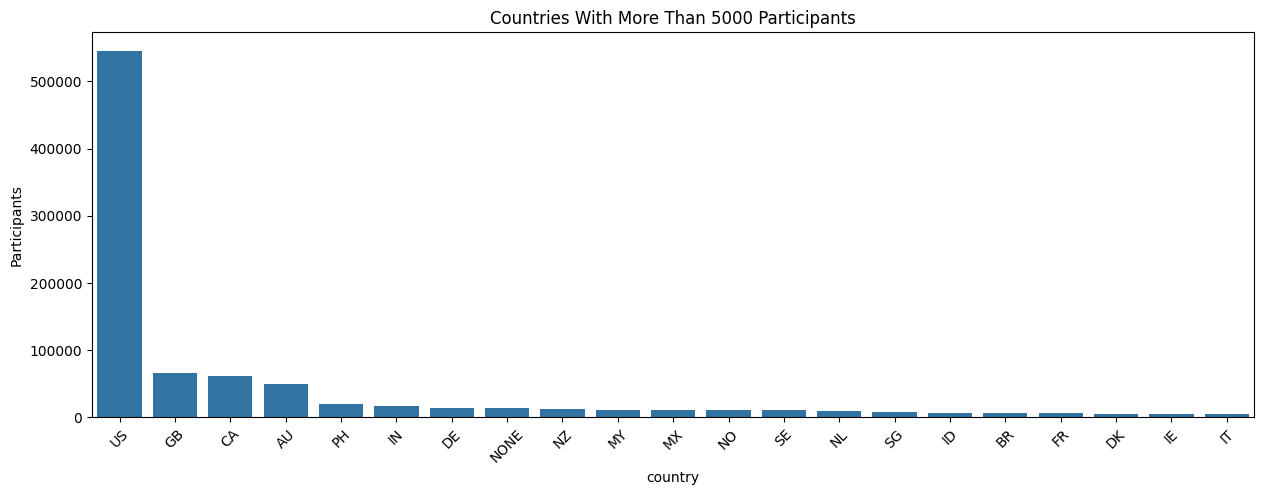

In [4]:
# Participants' nationality distriution
countries = data['country'].value_counts().reset_index()
countries.columns = ['country', 'count']
countries_5000 = countries[countries['count'] >= 5000]
plt.figure(figsize=(15,5))
sns.barplot(data=countries_5000, x='country', y='count')
plt.title('Countries With More Than 5000 Participants')
plt.ylabel('Participants')
plt.xticks(rotation=45)
plt.show()

In [5]:
# Groups and Questions
ext_questions = {'EXT1' : 'I am the life of the party',
                 'EXT2' : 'I dont talk a lot',
                 'EXT3' : 'I feel comfortable around people',
                 'EXT4' : 'I keep in the background',
                 'EXT5' : 'I start conversations',
                 'EXT6' : 'I have little to say',
                 'EXT7' : 'I talk to a lot of different people at parties',
                 'EXT8' : 'I dont like to draw attention to myself',
                 'EXT9' : 'I dont mind being the center of attention',
                 'EXT10': 'I am quiet around strangers'}

est_questions = {'EST1' : 'I get stressed out easily',
                 'EST2' : 'I am relaxed most of the time',
                 'EST3' : 'I worry about things',
                 'EST4' : 'I seldom feel blue',
                 'EST5' : 'I am easily disturbed',
                 'EST6' : 'I get upset easily',
                 'EST7' : 'I change my mood a lot',
                 'EST8' : 'I have frequent mood swings',
                 'EST9' : 'I get irritated easily',
                 'EST10': 'I often feel blue'}

agr_questions = {'AGR1' : 'I feel little concern for others',
                 'AGR2' : 'I am interested in people',
                 'AGR3' : 'I insult people',
                 'AGR4' : 'I sympathize with others feelings',
                 'AGR5' : 'I am not interested in other peoples problems',
                 'AGR6' : 'I have a soft heart',
                 'AGR7' : 'I am not really interested in others',
                 'AGR8' : 'I take time out for others',
                 'AGR9' : 'I feel others emotions',
                 'AGR10': 'I make people feel at ease'}

csn_questions = {'CSN1' : 'I am always prepared',
                 'CSN2' : 'I leave my belongings around',
                 'CSN3' : 'I pay attention to details',
                 'CSN4' : 'I make a mess of things',
                 'CSN5' : 'I get chores done right away',
                 'CSN6' : 'I often forget to put things back in their proper place',
                 'CSN7' : 'I like order',
                 'CSN8' : 'I shirk my duties',
                 'CSN9' : 'I follow a schedule',
                 'CSN10' : 'I am exacting in my work'}

opn_questions = {'OPN1' : 'I have a rich vocabulary',
                 'OPN2' : 'I have difficulty understanding abstract ideas',
                 'OPN3' : 'I have a vivid imagination',
                 'OPN4' : 'I am not interested in abstract ideas',
                 'OPN5' : 'I have excellent ideas',
                 'OPN6' : 'I do not have a good imagination',
                 'OPN7' : 'I am quick to understand things',
                 'OPN8' : 'I use difficult words',
                 'OPN9' : 'I spend time reflecting on things',
                 'OPN10': 'I am full of ideas'}

# Group Names and Columns
EXT = [column for column in data if column.startswith('EXT')]
EST = [column for column in data if column.startswith('EST')]
AGR = [column for column in data if column.startswith('AGR')]
CSN = [column for column in data if column.startswith('CSN')]
OPN = [column for column in data if column.startswith('OPN')]

In [6]:
# Defining a function to visualize the questions and answers distribution
def vis_questions(groupname, questions, color):
    plt.figure(figsize=(40,60))
    for i in range(1, 11):
        plt.subplot(10,5,i)
        plt.hist(data[groupname[i-1]], bins=14, color= color, alpha=.5)
        plt.title(questions[groupname[i-1]], fontsize=18)

Q&As Related to Extroversion Personality


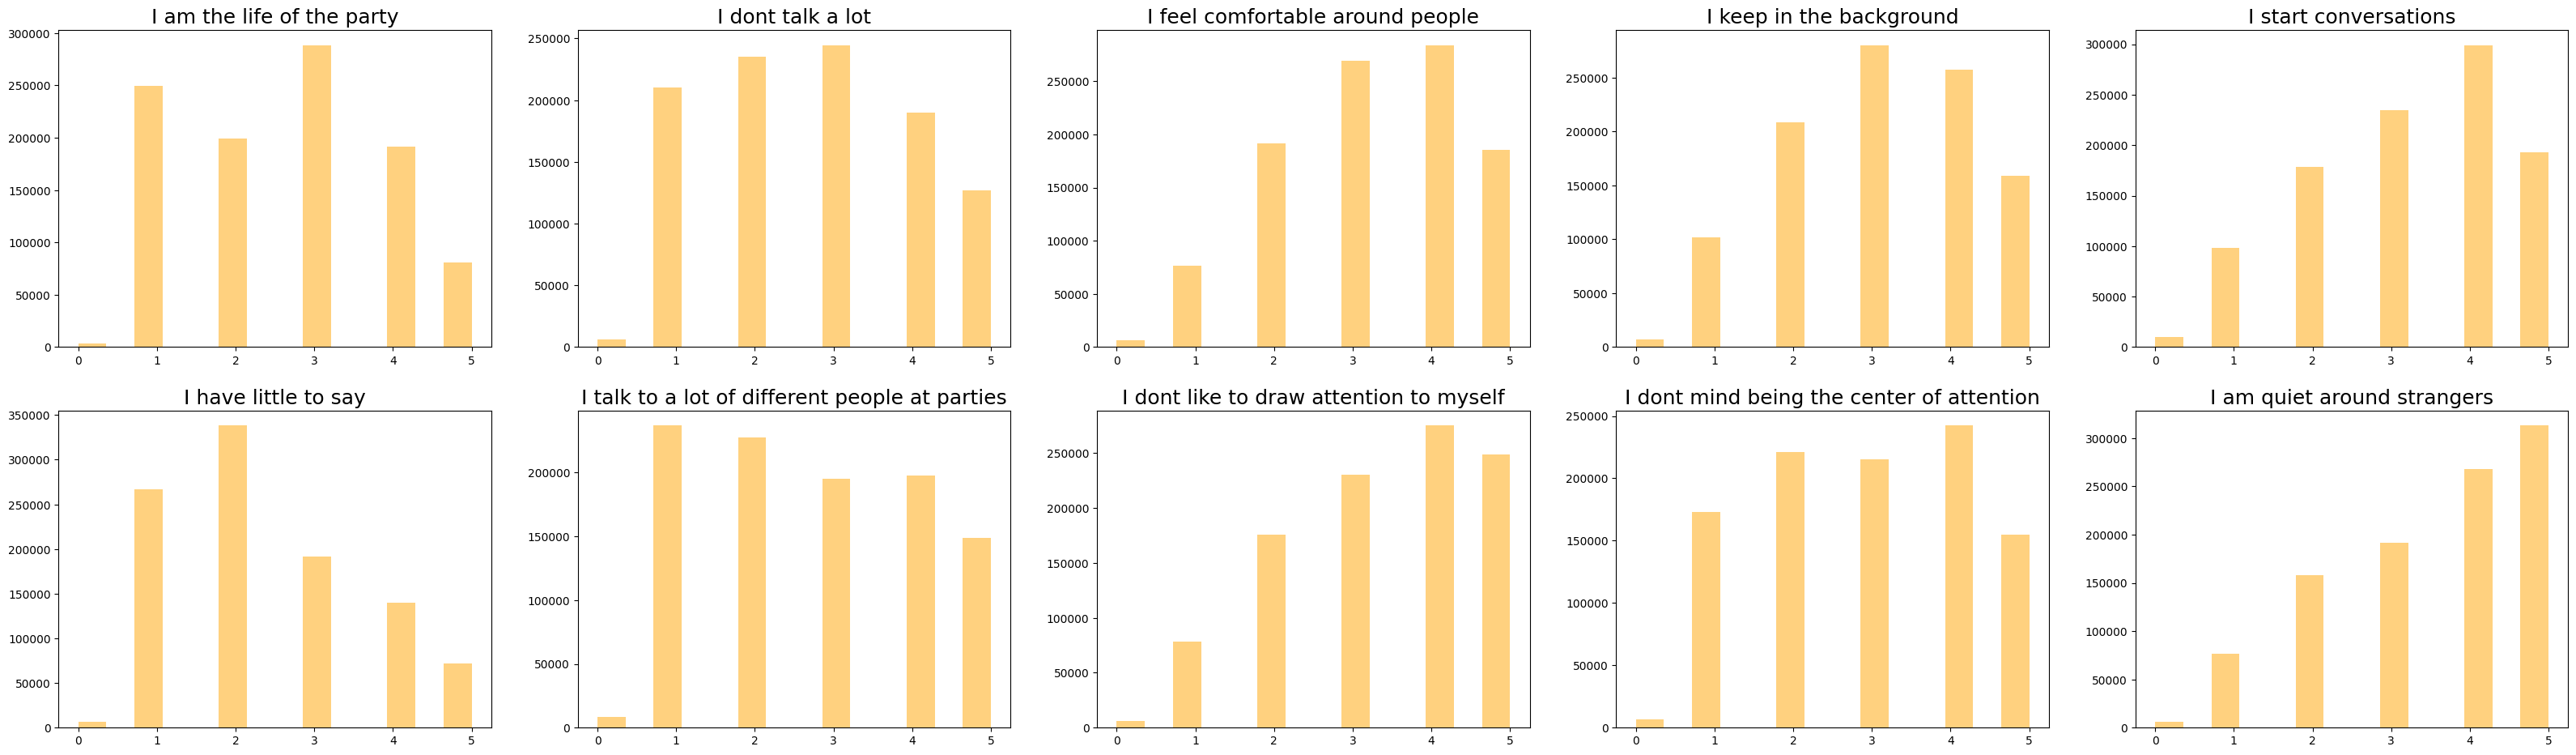

In [7]:
print('Q&As Related to Extroversion Personality')
vis_questions(EXT, ext_questions, 'orange')

Q&As Related to Neuroticism Personality


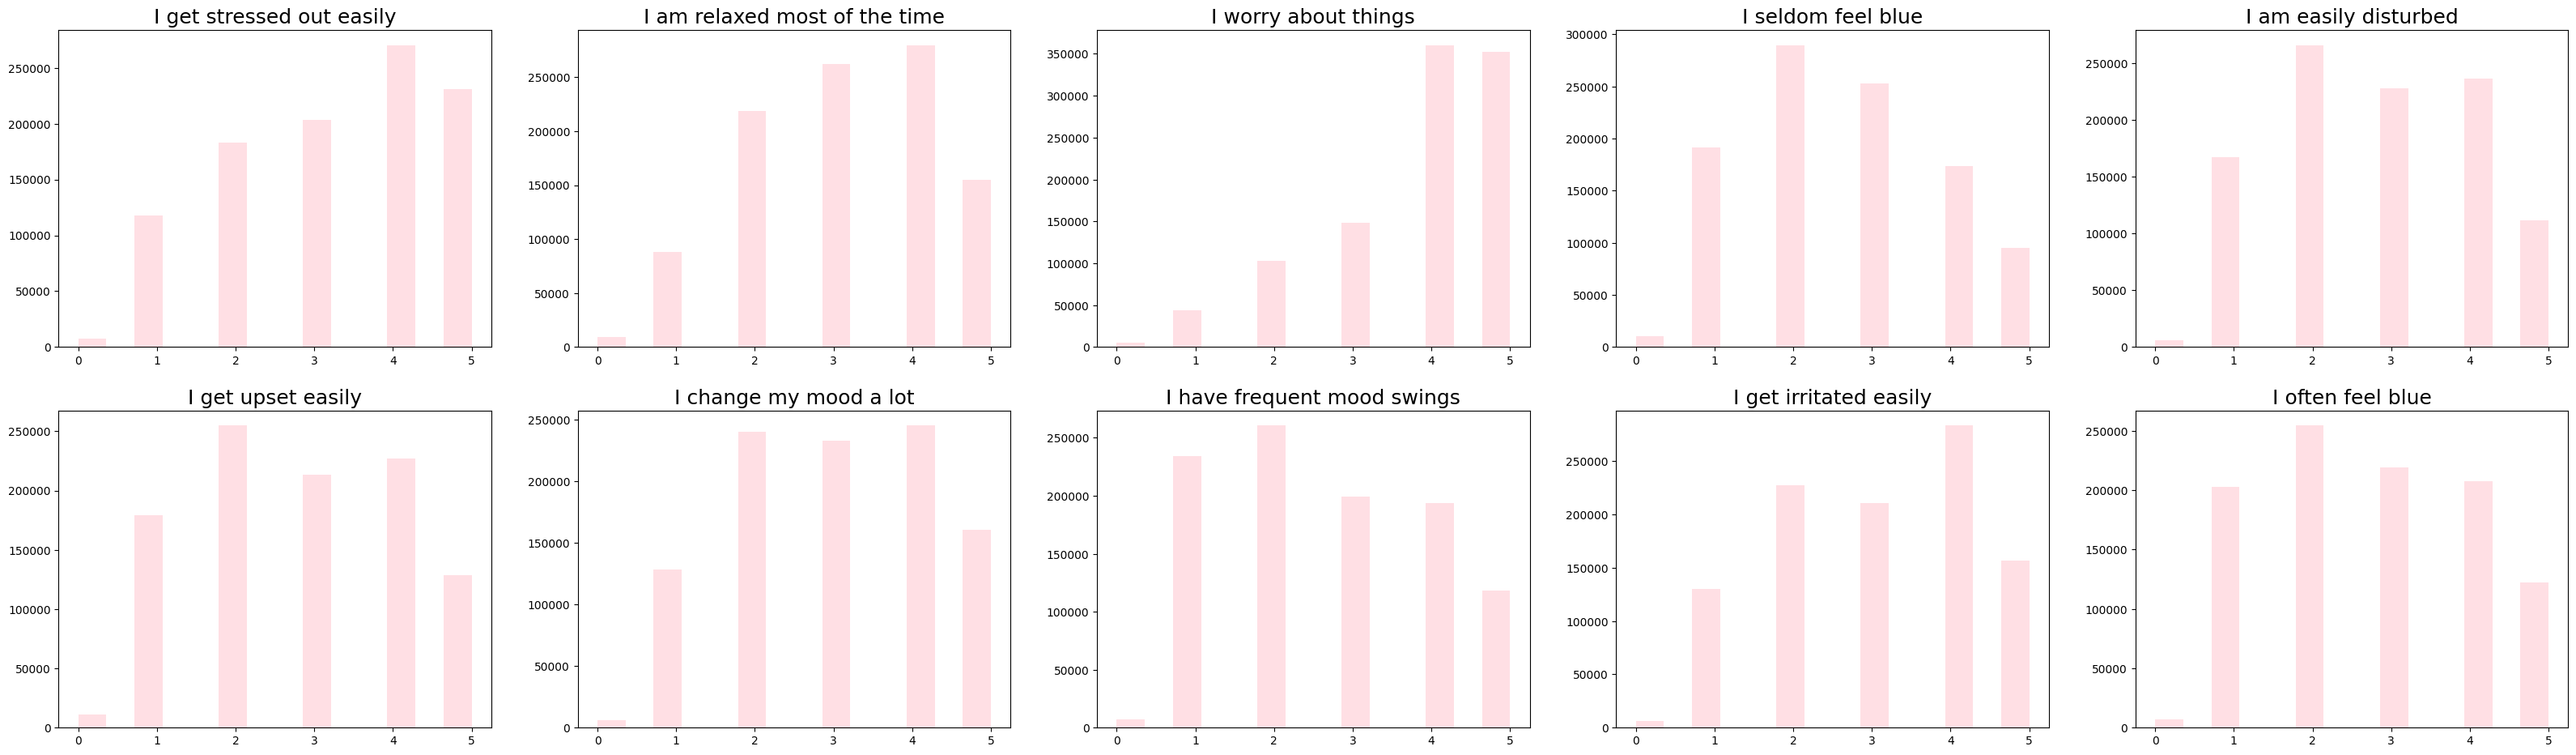

In [8]:
print('Q&As Related to Neuroticism Personality')
vis_questions(EST, est_questions, 'pink')

Q&As Related to Agreeable Personality


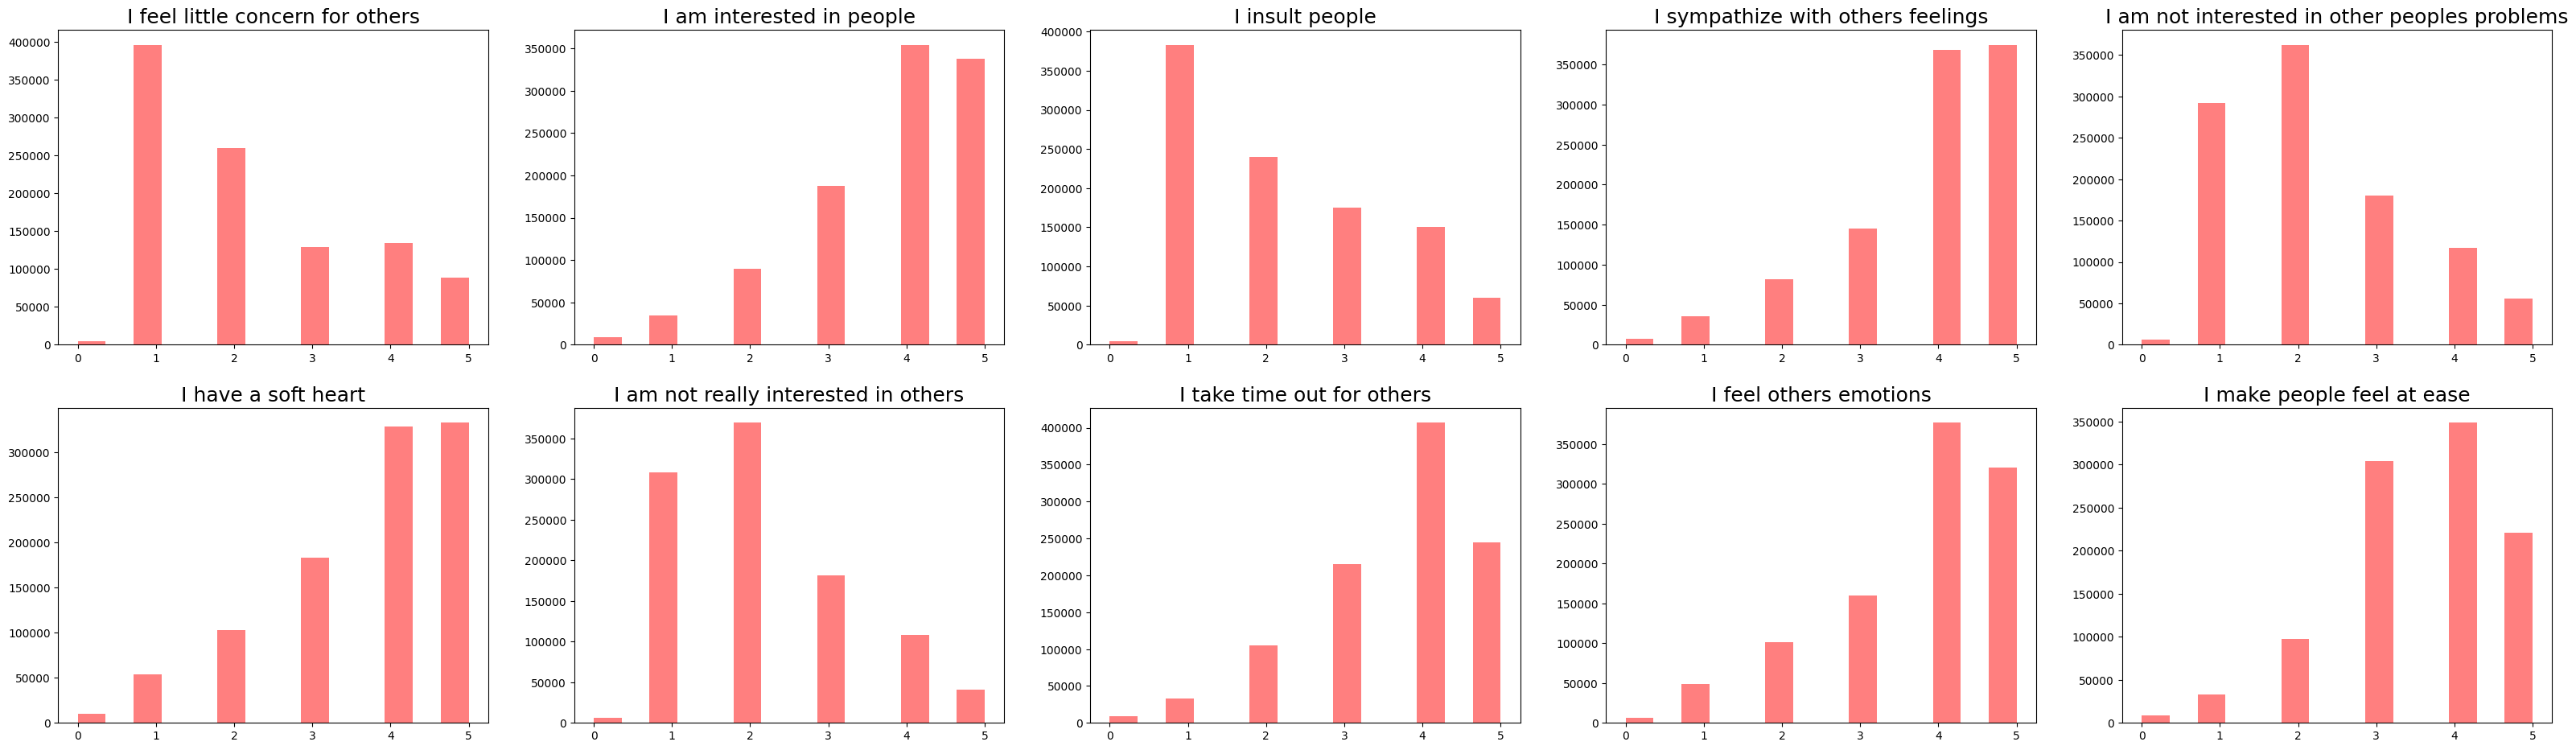

In [9]:
print('Q&As Related to Agreeable Personality')
vis_questions(AGR, agr_questions, 'red')

Q&As Related to Conscientious Personality


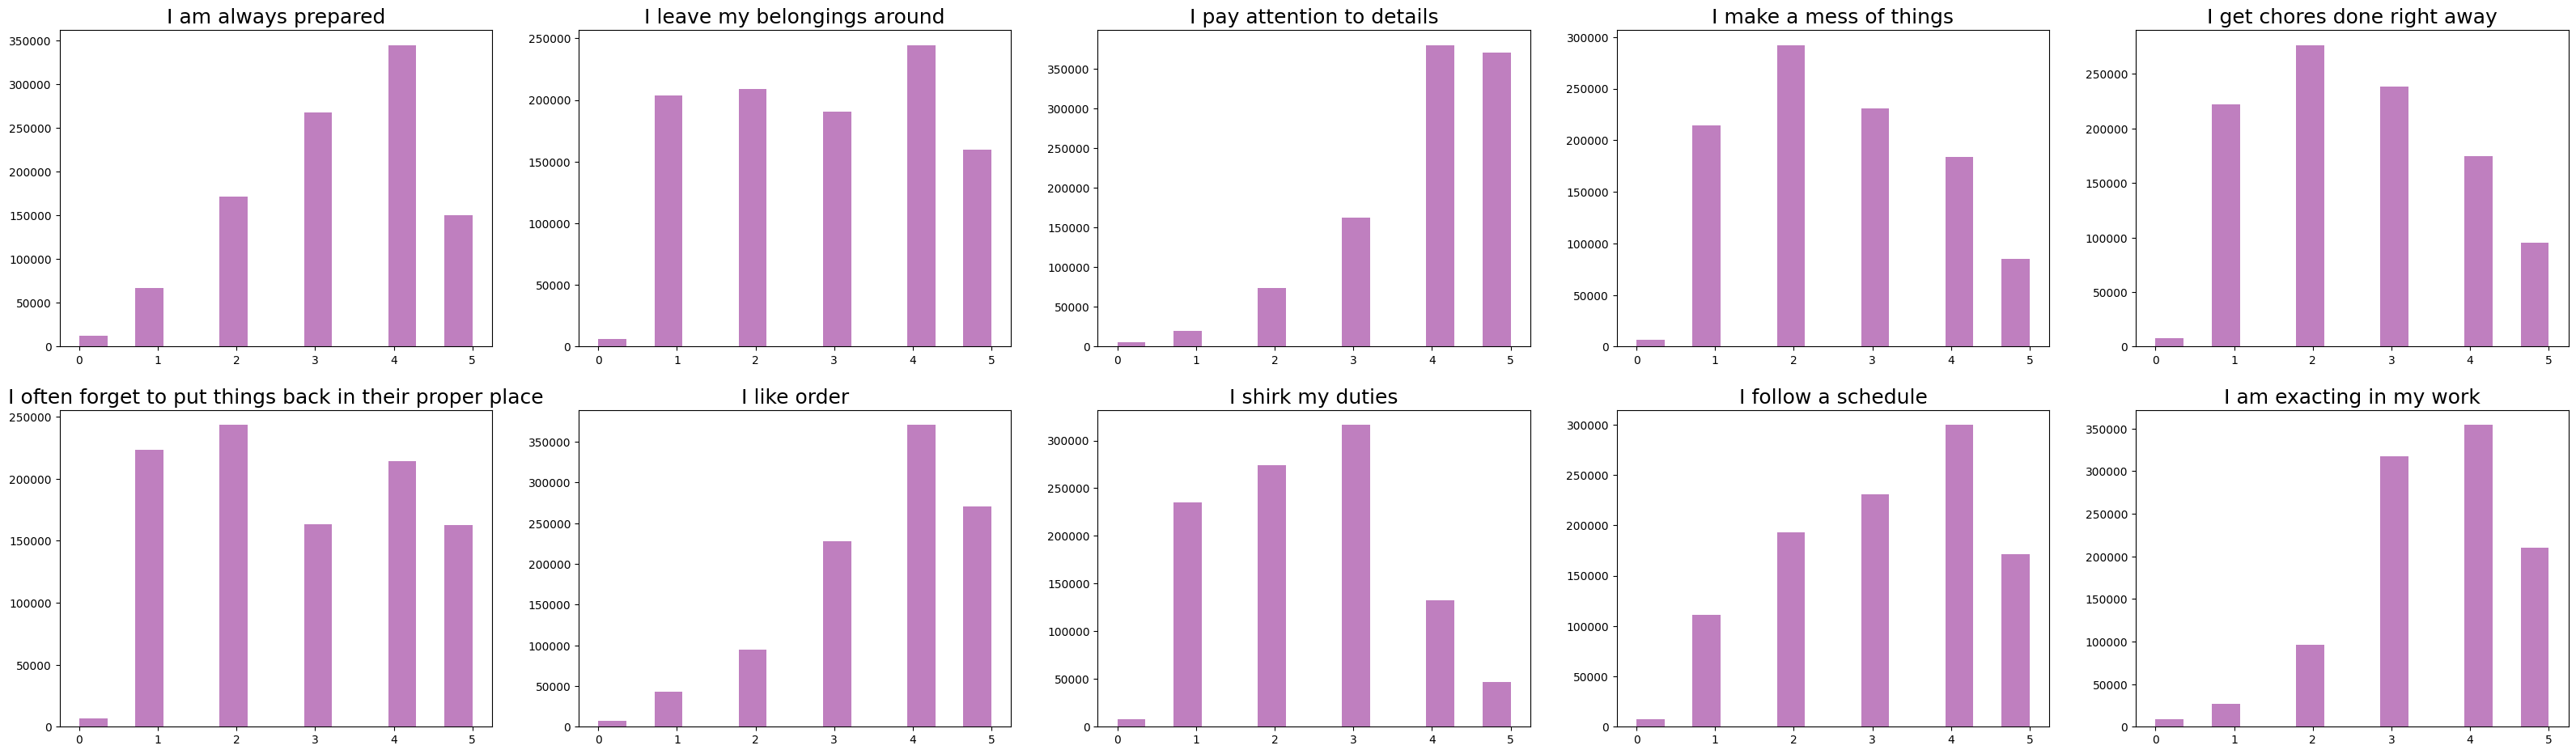

In [10]:
print('Q&As Related to Conscientious Personality')
vis_questions(CSN, csn_questions, 'purple')

Q&As Related to Open Personality


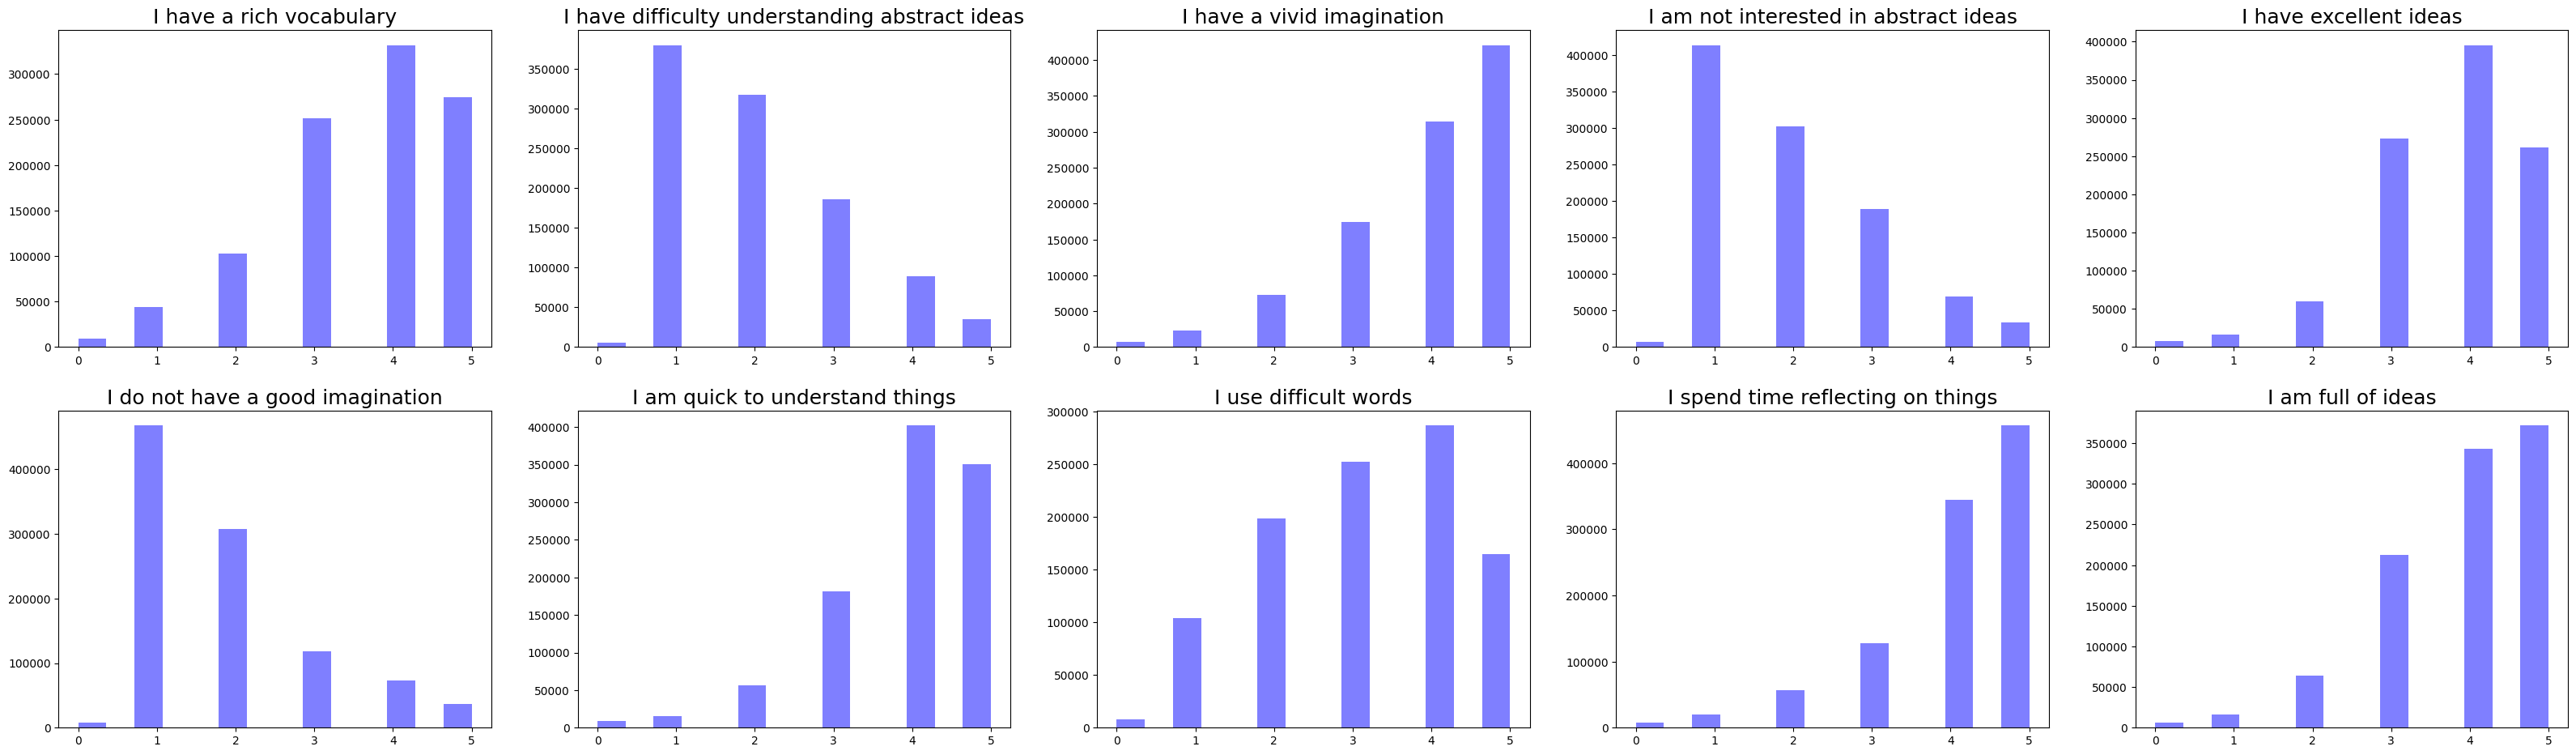

In [11]:
print('Q&As Related to Open Personality')
vis_questions(OPN, opn_questions, 'blue')

In [12]:
# For ease of calculation lets scale all the values between 0-1 and take a sample of 5000 
from sklearn.preprocessing import MinMaxScaler

df = data.drop('country', axis=1)
columns = list(df.columns)

scaler = MinMaxScaler(feature_range=(0,1))
df = scaler.fit_transform(df)
df = pd.DataFrame(df, columns=columns)
df_sample = df[:5000]

In [13]:
pip install yellowbrick

Note: you may need to restart the kernel to use updated packages.


In [14]:
import sklearn
import yellowbrick

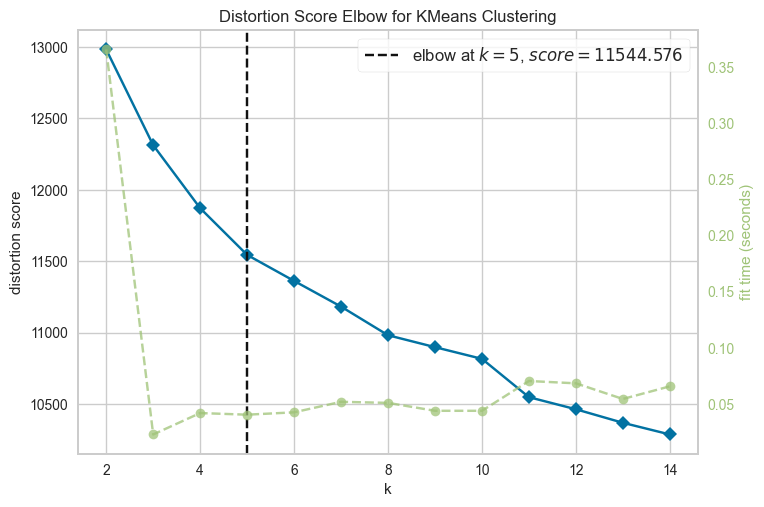

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [15]:
# Visualize the elbow
from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer

kmeans = KMeans()
visualizer = KElbowVisualizer(kmeans, k=(2,15))
visualizer.fit(df_sample)
visualizer.poof()

In [16]:
# Creating K-means Cluster Model
from sklearn.cluster import KMeans

# I use the unscaled data but without the country column
df_model = data.drop('country', axis=1)

# I define 5 clusters and fit my model
kmeans = KMeans(n_clusters=5)
k_fit = kmeans.fit(df_model)

In [17]:
# Predicting the Clusters
pd.options.display.max_columns = 10
predictions = k_fit.labels_
df_model['Clusters'] = predictions
df_model.head()

,EXT1,EXT2,EXT3,EXT4,EXT5,...,OPN7,OPN8,OPN9,OPN10,Clusters
0,4.0,1.0,5.0,2.0,5.0,...,5.0,3.0,4.0,5.0,1
1,3.0,5.0,3.0,4.0,3.0,...,4.0,2.0,5.0,3.0,4
2,2.0,3.0,4.0,4.0,3.0,...,5.0,3.0,4.0,4.0,4
3,2.0,2.0,2.0,3.0,4.0,...,4.0,4.0,3.0,3.0,4
4,3.0,3.0,3.0,3.0,5.0,...,5.0,3.0,5.0,5.0,1


In [18]:
df_model.Clusters.value_counts()

Clusters
3    258422
1    254139
2    250484
4    245657
0      4779
Name: count, dtype: int64

In [19]:
pd.options.display.max_columns = 150
df_model.groupby('Clusters').mean()

,EXT1,EXT2,EXT3,EXT4,EXT5,EXT6,EXT7,EXT8,EXT9,EXT10,EST1,EST2,EST3,EST4,EST5,EST6,EST7,EST8,EST9,EST10,AGR1,AGR2,AGR3,AGR4,AGR5,AGR6,AGR7,AGR8,AGR9,AGR10,CSN1,CSN2,CSN3,CSN4,CSN5,CSN6,CSN7,CSN8,CSN9,CSN10,OPN1,OPN2,OPN3,OPN4,OPN5,OPN6,OPN7,OPN8,OPN9,OPN10
Clusters,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0,1.175141,0.885541,0.759364,0.541954,0.417661,0.254865,0.174723,0.170538,0.172212,0.214480,1.033689,0.795773,0.695334,0.422683,0.308851,0.192509,0.169910,0.156309,0.181000,0.213015,1.071982,0.992258,0.549487,0.587361,0.325800,0.273697,0.161122,0.159029,0.186231,0.188952,1.110274,0.774848,0.734045,0.439632,0.302992,0.202134,0.161122,0.152961,0.175350,0.213434,0.987236,0.641766,0.634024,0.356978,0.321615,0.166771,0.163842,0.158820,0.184976,0.308014
1,3.277529,2.108944,4.206745,2.414088,4.131495,1.772270,3.666108,3.006674,3.513349,2.746131,2.522368,3.693105,3.336961,3.185521,2.196200,2.024794,2.192493,1.753497,2.218310,1.825135,1.837439,4.405310,1.748704,4.308044,1.818450,3.938207,1.594147,4.126423,4.158760,4.169498,3.803883,2.423257,4.257005,1.826737,3.258311,2.135650,3.979448,1.879845,3.706141,3.922452,3.838954,1.805937,4.049205,1.830215,4.105706,1.686058,4.279221,3.177726,4.136335,4.231539
2,3.432822,1.939864,3.785028,2.512232,4.018333,1.848477,3.624695,2.775630,3.747716,3.007601,3.738430,2.974705,4.181065,2.447154,3.243301,3.393255,3.741880,3.380420,3.605747,3.109668,2.198600,4.237249,2.657475,4.128711,2.046155,3.942400,1.890668,3.860255,4.072340,3.825801,2.956919,3.578484,3.824093,3.200364,2.245193,3.495944,3.441849,2.820591,2.932898,3.464732,3.727192,2.118455,4.221439,1.979480,3.948452,1.786693,3.961175,3.357656,4.157850,4.181932
3,1.834886,3.563543,2.357493,4.015626,2.403983,3.084025,1.793164,4.092481,2.148265,4.449377,4.262752,2.453096,4.536769,2.151373,3.510970,3.804870,3.901255,3.638146,3.916718,3.815585,2.288505,3.497129,2.373173,3.996413,2.380041,3.970664,2.531240,3.584219,3.844727,3.203903,3.065335,3.073515,3.948263,3.169436,2.370936,3.151226,3.740916,2.797409,3.067916,3.463459,3.523926,2.339166,4.057120,2.111597,3.486905,2.049392,3.737511,3.145394,4.317117,3.742208
4,2.080914,3.514994,2.860350,3.662823,2.611015,2.938390,2.056786,3.838942,2.507997,4.080091,2.630880,3.607966,3.367476,2.927452,2.450925,2.160419,2.393809,1.979797,2.646540,2.365343,2.733572,3.229597,2.297696,3.321188,2.890905,3.166016,2.815987,3.242423,3.129542,3.232027,3.409726,2.685171,3.929450,2.304551,2.672975,2.590006,3.692425,2.404271,3.149477,3.575017,3.579320,2.062913,3.728931,2.110715,3.700053,2.091241,4.004014,3.106478,3.945994,3.746496


In [20]:
# Summing up the different questions groups
col_list = list(df_model)
ext = col_list[0:10]
est = col_list[10:20]
agr = col_list[20:30]
csn = col_list[30:40]
opn = col_list[40:50]

data_sums = pd.DataFrame()
data_sums['extroversion'] = df_model[ext].sum(axis=1)/10
data_sums['neurotic'] = df_model[est].sum(axis=1)/10
data_sums['agreeable'] = df_model[agr].sum(axis=1)/10
data_sums['conscientious'] = df_model[csn].sum(axis=1)/10
data_sums['open'] = df_model[opn].sum(axis=1)/10
data_sums['clusters'] = predictions
data_sums.groupby('clusters').mean()

,extroversion,neurotic,agreeable,conscientious,open
clusters,,,,,
0,0.476648,0.416907,0.449592,0.426679,0.392404
1,3.084333,2.494838,3.210498,3.119273,3.314090
2,3.069240,3.381562,3.285965,3.196107,3.344032
3,2.974284,3.599153,3.167001,3.184841,3.251034
4,3.015230,2.653061,3.005895,3.041307,3.207615


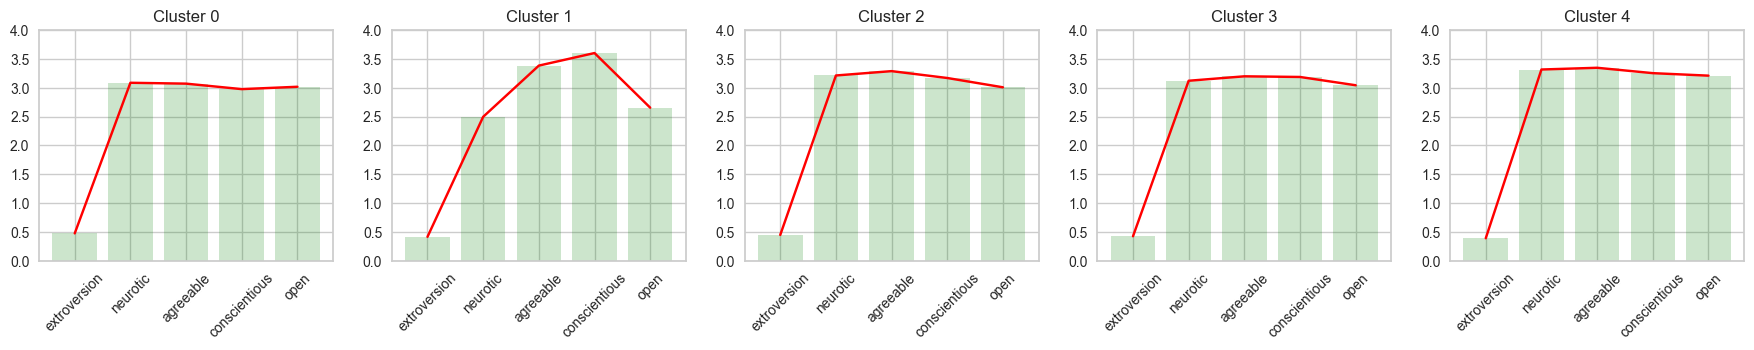

In [21]:
# Visualizing the means for each cluster
dataclusters = data_sums.groupby('clusters').mean()
plt.figure(figsize=(22,3))
for i in range(0, 5):
    plt.subplot(1,5,i+1)
    plt.bar(dataclusters.columns, dataclusters.iloc[:, i], color='green', alpha=0.2)
    plt.plot(dataclusters.columns, dataclusters.iloc[:, i], color='red')
    plt.title('Cluster ' + str(i))
    plt.xticks(rotation=45)
    plt.ylim(0,4);

In [22]:
# In order to visualize in 2D graph I will use PCA
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
pca_fit = pca.fit_transform(df_model)

df_pca = pd.DataFrame(data=pca_fit, columns=['PCA1', 'PCA2'])
df_pca['Clusters'] = predictions
df_pca.head()

,PCA1,PCA2,Clusters
0,5.700719,1.155540,1
1,-0.742600,-3.147499,4
2,0.153845,-2.354620,4
3,-1.450131,-0.341828,4
4,4.749823,-2.669542,1


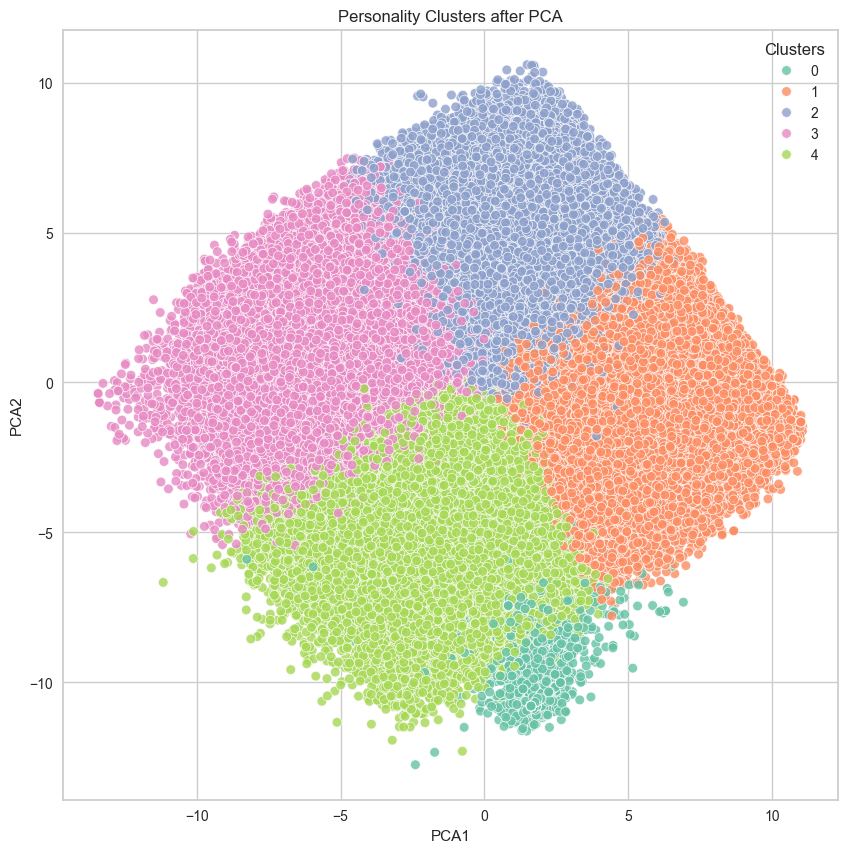

In [23]:
plt.figure(figsize=(10,10))
sns.scatterplot(data=df_pca, x='PCA1', y='PCA2', hue='Clusters', palette='Set2', alpha=0.8)
plt.title('Personality Clusters after PCA');

In [24]:
!pip install openpyxl

In [25]:
my_data = pd.read_excel(r"C:\Users\shash\Downloads\personality_test_responses.xlsx")
my_data

,EXT1,EXT2,EXT3,EXT4,EXT5,EXT6,EXT7,EXT8,EXT9,EXT10,EST1,EST2,EST3,EST4,EST5,EST6,EST7,EST8,EST9,EST10,AGR1,AGR2,AGR3,AGR4,AGR5,AGR6,AGR7,AGR8,AGR9,AGR10,CSN1,CSN2,CSN3,CSN4,CSN5,CSN6,CSN7,CSN8,CSN9,CSN10,OPN1,OPN2,OPN3,OPN4,OPN5,OPN6,OPN7,OPN8,OPN9,OPN10
0,1,1,5,4,5,5,4,2,4,2,2,3,1,4,5,3,1,1,5,2,4,1,4,1,2,2,4,4,2,5,4,5,5,4,4,3,5,5,2,2,3,5,5,1,1,4,4,2,5,4
1,5,2,4,3,4,1,2,2,4,5,5,2,2,2,5,2,4,4,5,4,4,5,1,4,1,2,5,1,5,4,4,2,5,2,3,4,2,2,2,2,1,3,4,1,4,4,3,1,1,5
2,5,4,5,4,5,2,4,5,3,1,5,3,2,5,5,3,1,1,5,3,5,4,5,1,2,4,5,2,3,3,4,4,4,4,2,1,5,3,2,5,1,5,3,4,1,5,5,5,3,4
3,5,2,3,1,3,5,3,2,2,4,1,5,2,3,3,1,1,1,3,3,5,4,5,5,3,2,3,4,5,2,5,1,4,4,3,5,1,3,1,1,2,2,1,2,5,5,1,3,2,4
4,5,2,4,5,5,2,3,5,2,1,1,1,5,5,1,5,1,3,3,2,5,2,3,3,1,3,2,3,2,3,3,4,1,2,2,3,4,5,3,2,5,5,3,5,2,3,3,2,3,1
5,1,3,2,2,4,3,5,4,3,2,5,3,4,2,2,3,2,3,1,2,5,1,3,3,2,1,4,2,5,5,5,5,3,2,1,2,2,1,4,4,4,4,5,1,3,5,5,1,3,2
6,4,2,3,4,3,1,5,2,4,1,2,3,1,5,4,3,3,3,1,4,1,5,1,4,1,1,4,3,1,3,3,5,3,1,3,2,5,5,1,5,2,2,4,2,4,5,5,2,5,3
7,2,1,4,2,3,1,3,4,2,4,1,5,2,5,5,3,4,4,3,3,1,3,3,4,1,1,3,2,4,2,3,2,4,5,3,2,4,3,2,4,5,5,3,5,4,5,1,2,5,5
8,2,5,3,1,1,1,2,3,3,5,2,5,1,3,1,1,2,5,1,5,5,3,5,3,5,5,2,2,2,4,2,4,2,4,3,4,2,5,2,2,4,1,3,1,2,3,1,1,1,5
9,3,5,2,4,4,3,5,3,5,3,4,1,3,5,3,3,1,1,1,4,2,3,2,2,3,5,1,5,3,4,4,5,5,3,4,5,1,4,4,2,1,4,3,3,3,2,2,3,4,5


In [26]:
my_personality = k_fit.predict(my_data)
print('My Personality Cluster: ', my_personality)

My Personality Cluster:  [4 2 4 4 4 4 1 4 4 4]


In [27]:
# Summing up the my question groups
col_list = list(my_data)
ext = col_list[0:10]
est = col_list[10:20]
agr = col_list[20:30]
csn = col_list[30:40]
opn = col_list[40:50]

my_sums = pd.DataFrame()
my_sums['extroversion'] = my_data[ext].sum(axis=1)/10
my_sums['neurotic'] = my_data[est].sum(axis=1)/10
my_sums['agreeable'] = my_data[agr].sum(axis=1)/10
my_sums['conscientious'] = my_data[csn].sum(axis=1)/10
my_sums['open'] = my_data[opn].sum(axis=1)/10
my_sums['cluster'] = my_personality
print('Sum of my question groups')
my_sums

Sum of my question groups


,extroversion,neurotic,agreeable,conscientious,open,cluster
0,3.3,2.7,2.9,3.9,3.4,4
1,3.2,3.5,3.2,2.8,2.7,2
2,3.8,3.3,3.4,3.4,3.6,4
3,3.0,2.3,3.8,2.8,2.7,4
4,3.4,2.7,2.7,2.9,3.2,4
5,2.9,2.7,3.1,2.9,3.3,4
6,2.9,2.9,2.4,3.3,3.4,1
7,2.6,3.5,2.4,3.2,4.0,4
8,2.6,2.6,3.6,3.0,2.2,4
9,3.7,2.6,3.0,3.7,3.0,4


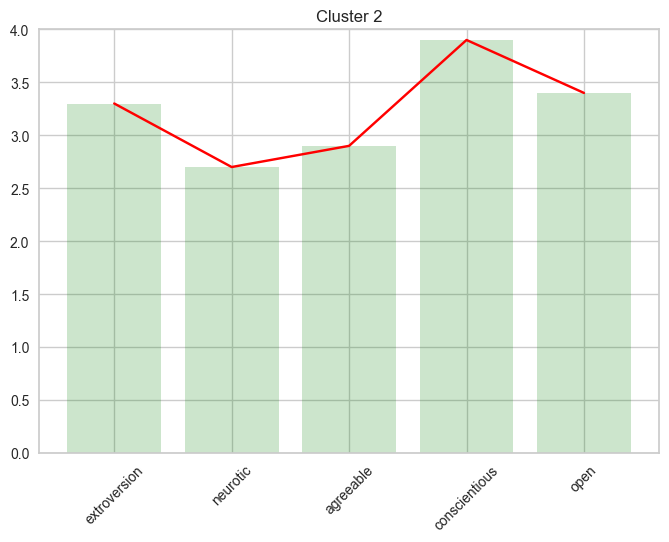

In [28]:
my_sum = my_sums.drop('cluster', axis=1)
plt.bar(my_sum.columns, my_sum.iloc[0,:], color='green', alpha=0.2)
plt.plot(my_sum.columns, my_sum.iloc[0,:], color='red')
plt.title('Cluster 2')
plt.xticks(rotation=45)
plt.ylim(0,4);